<h1>Neural Spiral MIT</h1>
<h6>Saket Tiwari</h6>
Date: 10 August, 2019

In [3]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

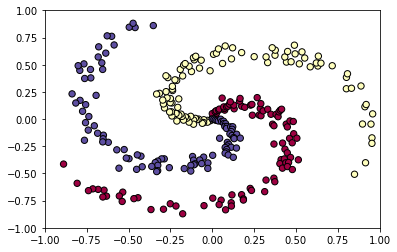

In [4]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [8]:
h=100 #size of hidden layers

#preparing hidden layer1
W= 0.01 * np.random.randn(D,h) #(dimension of weights is (2,100))
b= np.zeros((1,h)) #(dimesion of intercept(1,100))
            
W2= 0.01 * np.random.randn(h,K) #(100,3)
b2=np.zeros((1,K))

#
step_size=1e-0
#Regulatisation
reg=1e-3
            
num_examples= X.shape[0] #300

for i in range(10000):
    
    #Forward Propagation
    #(1) Generate class scores
    #X-> training point 
    #------------->REnU(theta transpose * X)
    hidden_layer =np.maximum(0, np.dot(X,W) + b) # (300,100) output of middle neurons or hidden_layers (relu applied)
    scores= np.dot(hidden_layer, W2) +b2 # (300,2) output_layer output of last neurons
    
    #(2) Compute class probabilities using Softmax
    exp_scores= np.exp(scores) # (300, 3) 
    probs=exp_scores/ np.sum(exp_scores, axis=1, keepdims=True) #(300,3)
    
    #(3) Calculate Loss
    correct_logprobs= -np.log( probs[ range(num_examples), y ] ) # loss= -log y^
    data_loss=np.sum(correct_logprobs) / num_examples #scalar  # mean error
    
    #(4) Noise->Regularisation to prevent overfitting
    reg_loss=0.5 * reg * np.sum (W*W) + 0.5 * reg*np.sum(W2*W2)
    loss= data_loss + reg_loss
    
    if i%1000==0:
        print(f"iter {i}: loss { loss}")
        
    #back propagation
    #loss= -log y'
    #derivative of loss : y^-y
    #(1)  Find gradient of loss (y^ - y)
    
    descores =probs #descores will store yi^-yi
    descores[ range( num_examples), y ] -=1  #calculating yi^-yi
    descores /= num_examples #(300,3)
    
    # (2) Backprop into prams(weights) W2,b2
    dW2 = np.dot(hidden_layer.T , descores) #(100,3)
    db2 = np.sum(descores,axis=0, keepdims= True) #(1,3)
    
    # (3a) Backprop * hidden_layer
    dhidden = np.dot(descores, W2.T)
    dhidden[ hidden_layer <= 0] = 0
    
    # (3b) Backprop into W,b
    dW = np.dot(X.T , dhidden) #(2,100)
    db= np.sum(dhidden, axis=0, keepdims=True) #(1,100)
    
    dW2 += reg * W2
    dW += reg*W
    
    # (4) Update rule
    W -= step_size *dW
    b-= step_size*db
    W2-= step_size*dW2
    b2-= step_size* db2
    

iter 0: loss 1.098531398468504
iter 1000: loss 0.2984010983088865
iter 2000: loss 0.2613717681299002
iter 3000: loss 0.24940822753704467
iter 4000: loss 0.24524717303518517
iter 5000: loss 0.24447402244073654
iter 6000: loss 0.24419588039951706
iter 7000: loss 0.24407939388111377
iter 8000: loss 0.2440306020530724
iter 9000: loss 0.24395892566904406


In [9]:
hidden_layer = np.maximum( 0, np.dot(X,W)+b)  #Relu
scores = np.dot(hidden_layer, W2) +b2
predicted_class=np.argmax(scores, axis=1)
np.mean(predicted_class==y)*100

98.66666666666667

(-1.8712034092398278, 1.8687965907601756)

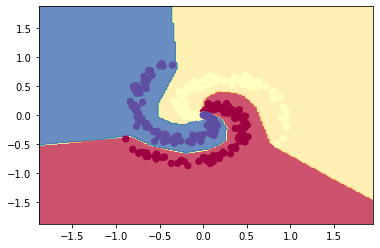

In [10]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')